In [57]:
import os
os.chdir("C:\\Users\\PRINCE OYEKAN\\Documents")

In [58]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#loading the dataset
data=pd.read_csv("Vehicle_type.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Toyota,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Nissan Primeria,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Madza,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Benz 360,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Volvo 340,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
#Getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [61]:
#Checking for null values in the dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [62]:
#To check the statistical data in the dataset
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [63]:
#To get the columns in the dataset
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [64]:
#To check the categorical data in the dataset
print(data["Transmission"].value_counts())

Manual       259
Automatic     42
Name: Transmission, dtype: int64


In [65]:
print(data["Selling_Price"].value_counts())

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64


In [66]:
fuel_type=data['Fuel_Type']
transmission_type=data['Transmission']
seller_type=data['Seller_Type']
selling_price=data['Selling_Price']

In [67]:
#Converting the categorical data into numerical data using manual encoding
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#With one-hot encoding
data=pd.get_dummies(data,columns=['Seller_Type','Transmission'],drop_first=True)

In [68]:
#Checking to see if the categorical to numerical values has been effected
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,Toyota,2014,3.35,5.59,27000,0,0,0,1
1,Nissan Primeria,2013,4.75,9.54,43000,1,0,0,1
2,Madza,2017,7.25,9.85,6900,0,0,0,1
3,Benz 360,2011,2.85,4.15,5200,0,0,0,1
4,Volvo 340,2014,4.60,6.87,42450,1,0,0,1


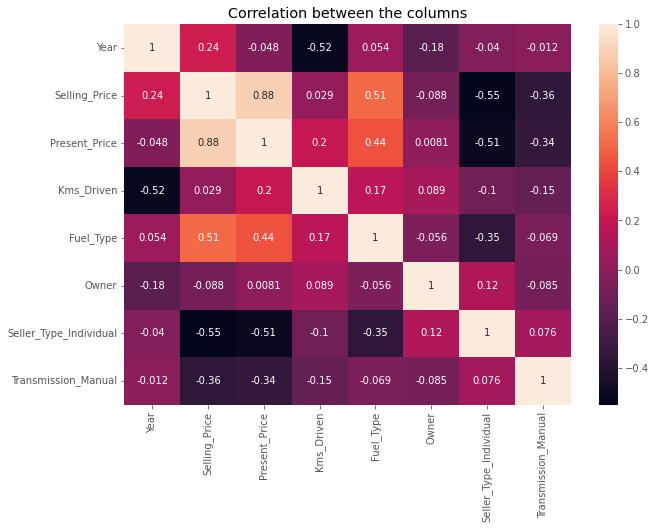

In [69]:
#To find the correlation between different columns using HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation between the columns")
plt.show()

<AxesSubplot:title={'center':'Correlation between the present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

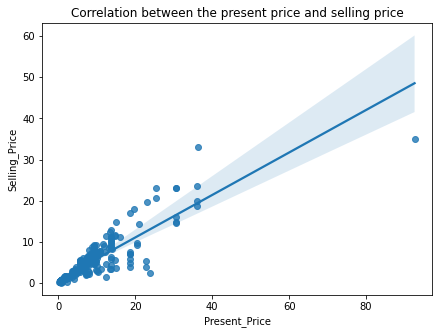

In [21]:
#To find the correlation between present price and selling price
fig=plt.figure(figsize=(7,5))
plt.title("Correlation between the present price and selling price")
sns.regplot(x='Present_Price',y='Selling_Price',data=data)

In [70]:
#Splitting the dataset into X and y
X=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [71]:
#Training and testing the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
#Checking the shape of the training and testing data
print("X train shape  is : ",X_train.shape)
print("X test shape  is : ",X_test.shape)
print("y train shape  is : ",y_train.shape)
print("y test shape  is : ",y_train.shape)

X train shape  is :  (240, 7)
X test shape  is :  (61, 7)
y train shape  is :  (240,)
y test shape  is :  (240,)


In [73]:
#Using Standard Scaler to normalise and fit the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [75]:
#Importing the linear Regression model
from sklearn.linear_model import LinearRegression
Lreg=LinearRegression()
Lreg.fit(X_train,y_train)

LinearRegression()

In [76]:
pred=Lreg.predict(X_test)

In [77]:
#To check how our model fits into the data,we use the mean square
#The r2_score is used to check how close the predicted values are to the actual value
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MAE: ',(metrics.mean_absolute_error(pred,y_test)))
print('MSE: ',(metrics.mean_squared_error(pred,y_test)))
print('r2_score:',(metrics.r2_score(pred,y_test)))

MAE:  0.9750166438484982
MSE:  2.1603876958200923
r2_score: 0.8895096730354197


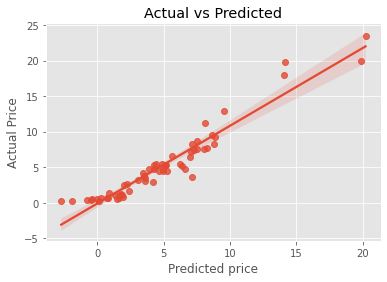

In [78]:
#Visualisations showing Actual vs predicted values
sns.regplot(x=pred,y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted")
plt.show()

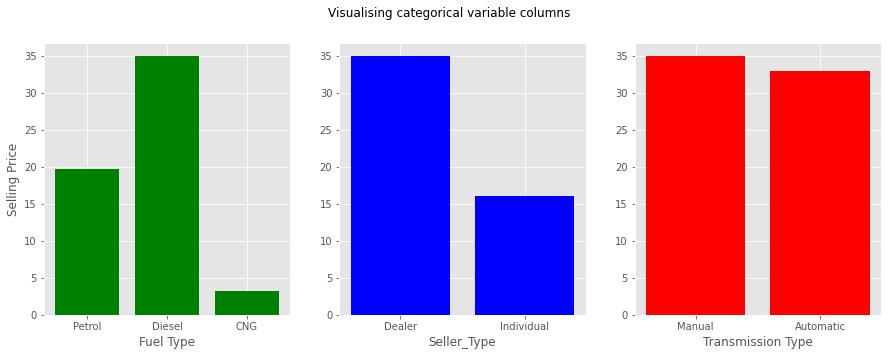

In [79]:
#Visualising Categorical variable columns
from matplotlib import style
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle("Visualising categorical variable columns")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='green')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='blue')
plt.xlabel("Seller_Type")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color='red')
plt.xlabel("Transmission Type")
plt.show()